<a href="https://colab.research.google.com/github/IMKanna1228/kaggle-ml-solutions/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv('/content/diabetes.csv',)

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_data.shape

(768, 9)

In [12]:
diabetes_data['Outcome'].head

<bound method NDFrame.head of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [13]:
X = diabetes_data.drop(columns='Outcome',axis=1)

In [14]:
Y = diabetes_data['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Perfect data

In [19]:
Y.isnull().sum()

0

Plotting some graphs to understand the data

In [49]:
def Diabetes_yes_no(feature):
  diabetes_yes = diabetes_data[diabetes_data['Outcome'] == 1][feature].value_counts()
  diabetes_no = diabetes_data[diabetes_data['Outcome']== 0][feature].value_counts()

  df = pd.DataFrame([diabetes_yes,diabetes_no])
  df.index = ['diabetes_yes','diabetes_no']

  df.plot(kind='bar',stacked = False, figsize = (10,5))



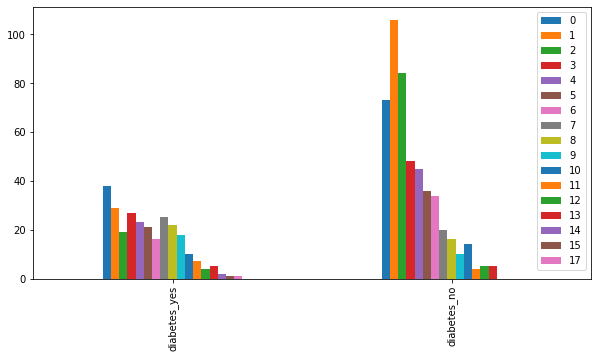

In [28]:
Diabetes_yes_no('Pregnancies')

In [32]:
X['Pregnancies'].head(30)

0      6
1      1
2      8
3      1
4      0
5      5
6      3
7     10
8      2
9      8
10     4
11    10
12    10
13     1
14     5
15     7
16     0
17     7
18     1
19     1
20     3
21     8
22     7
23     9
24    11
25    10
26     7
27     1
28    13
29     5
Name: Pregnancies, dtype: int64

In [35]:
X['Pregnancies'].shape

(768,)

In [38]:
X[X['Pregnancies']>12]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
28,13,145,82,19,110,22.2,0.245,57
72,13,126,90,0,0,43.4,0.583,42
86,13,106,72,54,0,36.6,0.178,45
88,15,136,70,32,110,37.1,0.153,43
159,17,163,72,41,114,40.9,0.817,47
274,13,106,70,0,0,34.2,0.251,52
298,14,100,78,25,184,36.6,0.412,46
323,13,152,90,33,29,26.8,0.731,43
357,13,129,0,30,0,39.9,0.569,44
455,14,175,62,30,0,33.6,0.212,38


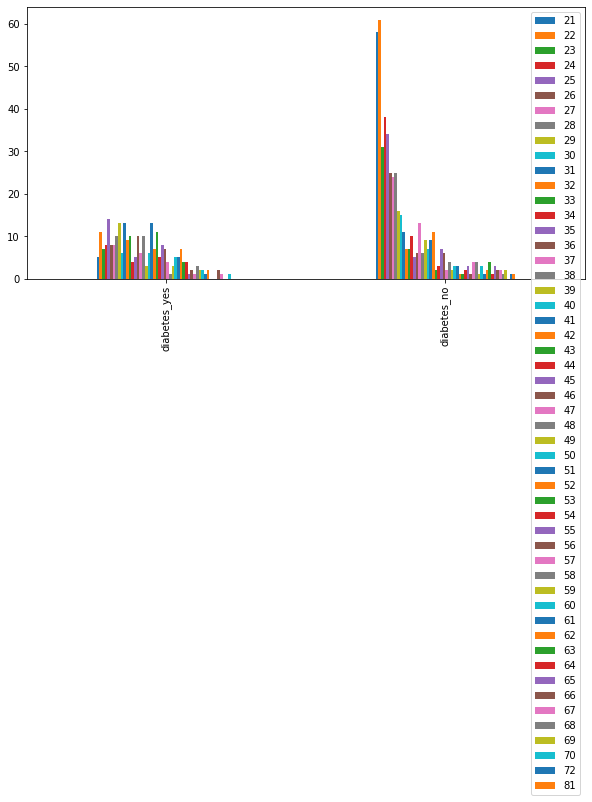

In [50]:
Diabetes_yes_no('Age')

In [52]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


As we can see the values of feature 'pregancies' ranges from 1 to 17 and of feature 'Glucose' ranges in multipleas of hundreds and same goes on with the other feature. it will become tough to train ml algorith with this type of data amnd thats the reason why we standardize our data  

In [58]:
Scaler = StandardScaler()

In [63]:
standardized_Data = Scaler.fit_transform(X)

In [65]:
print(standardized_Data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


now we can see the values of feature are very close 

In [66]:
X = standardized_Data

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [81]:
x_train.shape

(614, 8)

In [82]:
x_test.shape

(154, 8)

In [78]:
X.shape

(768, 8)

In [79]:
Y.shape

(768,)

In [88]:
model = svm.SVC(kernel = 'linear')

In [89]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [99]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [90]:
x_train_prediction = model.predict(x_train)
acc_train = accuracy_score(x_train_prediction,y_train)

In [91]:
print(acc_train)

0.7833876221498371


In [92]:
x_test_prediction = model.predict(x_test)
acc_test = accuracy_score(x_test_prediction,y_test)

In [93]:
print(acc_test)

0.7792207792207793


In [94]:
input = (4,110,92,0,0,37.6,0.191,30)

input_array = np.asarray(input)

input_array_reshape = input_array.reshape(1,-1)

prediction = model.predict(input_array_reshape)

print(prediction)
if prediction[0] == 0:
  print('Person doesnt have diabetes')
else:
  print('person is diabeteic')

[1]
person is diabeteic
